# Replicação do paper Classifying Exoplanets with Machine Learning

O notebook a seguir tenta refazer o estudo documentado em https://presentations.copernicus.org/EPSC2020/EPSC2020_833_presentation.pdf utilizando dados recentes encontrados em
https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.units import jupiterMass, jupiterRad, a, day, earthRad, earthMass, solMass, solRad, AU
from sklearn.cluster import KMeans
from numpy import unique
from numpy import where
from sklearn.preprocessing import normalize

In [2]:
exop_df = pd.read_csv("exoplanetsdata_updated.csv")

In [3]:
exop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          5599 non-null   object 
 1   hostname         5599 non-null   object 
 2   sy_snum          5599 non-null   int64  
 3   sy_pnum          5599 non-null   int64  
 4   discoverymethod  5599 non-null   object 
 5   disc_year        5599 non-null   int64  
 6   disc_facility    5599 non-null   object 
 7   pl_controv_flag  5599 non-null   int64  
 8   pl_orbper        5350 non-null   float64
 9   pl_orbpererr1    4871 non-null   float64
 10  pl_orbpererr2    4871 non-null   float64
 11  pl_orbperlim     5350 non-null   float64
 12  pl_orbsmax       5302 non-null   float64
 13  pl_orbsmaxerr1   2697 non-null   float64
 14  pl_orbsmaxerr2   2697 non-null   float64
 15  pl_orbsmaxlim    5303 non-null   float64
 16  pl_rade          5580 non-null   float64
 17  pl_radeerr1   

Plotting planetary mass as a function of the orbital period on logarithmic scale, three groups are easily distinguishable.

- pl_bmasse	Planet Mass [Earth Mass]	Amount of matter contained in the planet, measured in units of masses of the Earth
- pl_orbper	Orbital Period [days]	Time the planet takes to make a complete orbit around the host star or system

    - Hot Jupiters: M ∼ 1MJ, P ∼ 3 days.
    - Long Period Giants: M ∼ 1MJ, P > 100 days.
    - Non-Giants: all the other exoplanets


In [27]:
exop_df = exop_df[["pl_name","pl_orbper","pl_bmasse"]]

In [28]:
exop_df=exop_df.dropna(axis=0)

In [29]:
len(exop_df)

5327

In [30]:
exop_df.describe()

,pl_orbper,pl_bmasse
count,5.327000e+03,5327.000000
mean,4.821228e+03,402.832985
std,1.704502e+05,2382.974704
min,9.070629e-02,0.020000
25%,4.497811e+00,3.890000
50%,1.160650e+01,8.250000
75%,4.169164e+01,121.387700
max,8.040000e+06,89700.000000


In [31]:
X = exop_df[["pl_orbper","pl_bmasse"]].values
#X = normalize(X, norm="l2")

In [32]:
# define the model
model = KMeans(n_clusters=3,n_init='auto')

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)


In [33]:
exop_df['cluster'] = yhat

<Axes: xlabel='pl_orbper', ylabel='pl_bmasse'>

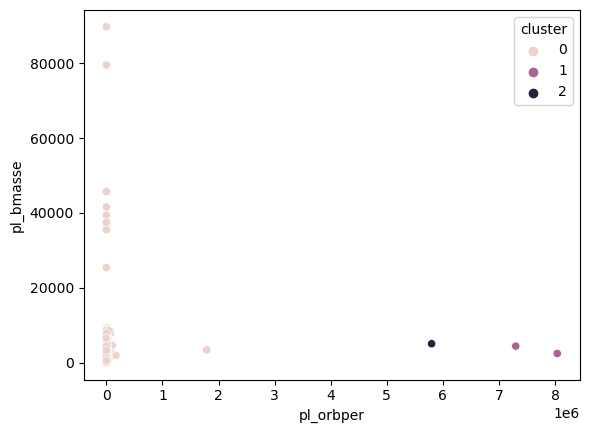

In [34]:
sns.scatterplot(
    data=exop_df, 
    x="pl_orbper", 
    y="pl_bmasse",
    hue="cluster"
)

In [35]:
# Lets get rid of the outlier
exop_df = exop_df.loc[exop_df['pl_orbper'] < 30000000].copy()

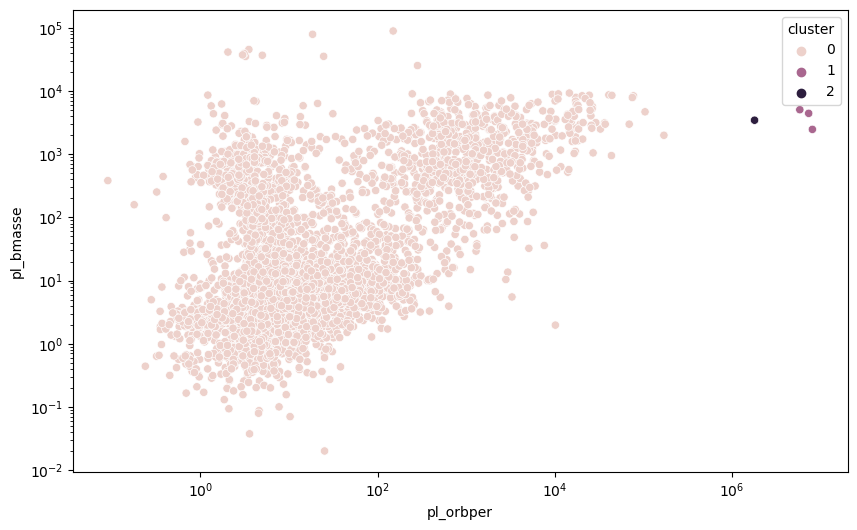

In [36]:
X = exop_df[["pl_orbper","pl_bmasse"]].values
#X = normalize(X, norm="l2")
# define the model
model = KMeans(n_clusters=3,n_init='auto')

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)

# retrieve unique clusters
clusters = unique(yhat)

exop_df['cluster'] = yhat

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=exop_df, 
    x="pl_orbper", 
    y="pl_bmasse",
    hue="cluster"
)

plt.yscale('log') 
plt.xscale('log') 
plt.show()

In [37]:
from sklearn.cluster import DBSCAN

# define the model
model = DBSCAN(eps=0.15, min_samples=900)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)


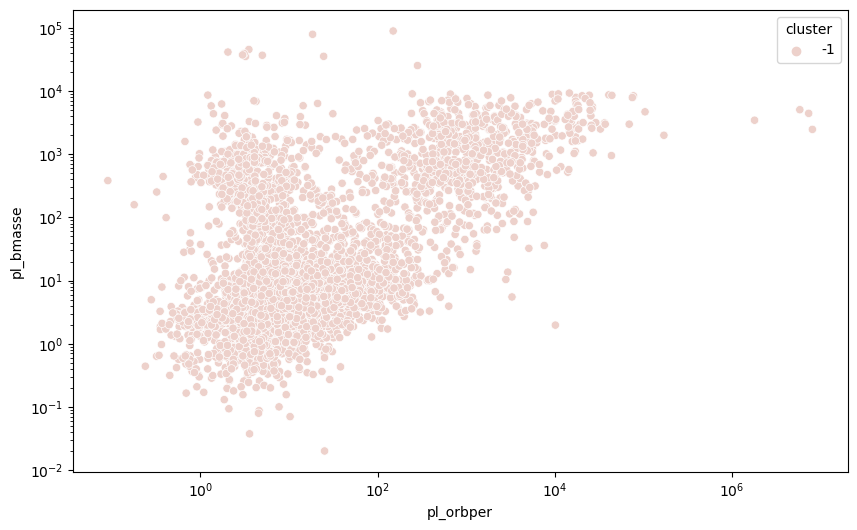

In [38]:
exop_df['cluster'] = yhat

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=exop_df, 
    x="pl_orbper", 
    y="pl_bmasse",
    hue="cluster"
)

plt.yscale('log') 
plt.xscale('log') 
plt.show()

In [39]:
kmeans = KMeans(n_init='auto', n_clusters=3,init='k-means++',max_iter=300, tol=0.0003).fit(np.log10(X))

centroids, labels = kmeans.cluster_centers_, kmeans.labels_

N = [1,2,5]

colors, group_names = ['r','b','g','r','k'], ['Hot Jupiters','Ungiants','Long Period Giants']
label_color, label_names = [], []
for l in labels:
    label_color = np.append(label_color, colors[l])
    label_names = np.append(label_names, group_names[l])

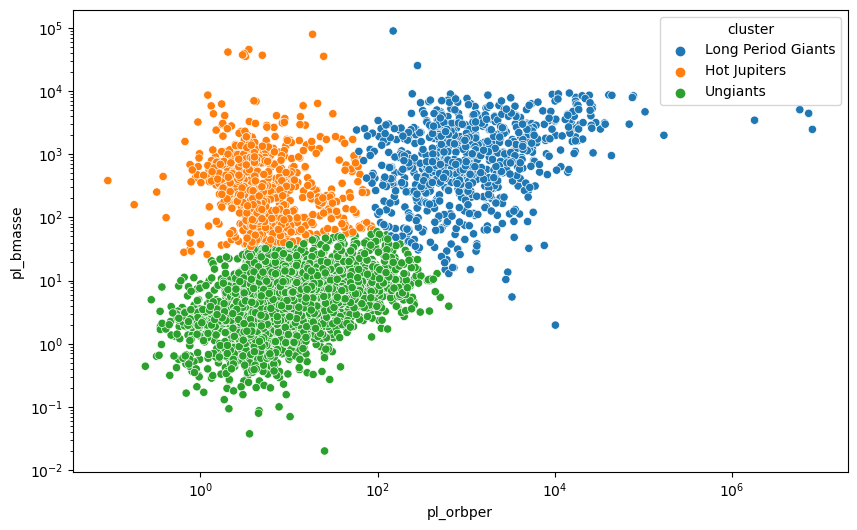

In [40]:
exop_df['cluster'] = label_names

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=exop_df, 
    x="pl_orbper", 
    y="pl_bmasse",
    hue="cluster"
)

plt.yscale('log') 
plt.xscale('log') 
plt.show()

O gráfico acima, difere um pouco da classificação pretendia, que era:

    - Hot Jupiters: M ∼ 1MJ, P ∼ 3 days.
    - Long Period Giants: M ∼ 1MJ, P > 100 days.
    - Non-Giants: all the other exoplanets
    
        - pl_bmasse	Planet Mass [Earth Mass]	Amount of matter contained in the planet, measured in units of masses of the Earth
        - pl_orbper	Orbital Period [days]	Time the planet takes to make a complete orbit around the host star or system

- O valor divisório de massa de planeta parece ser 50 MJ
- O valor de período orbital parece estar na faixoa de 500 dias


In [41]:
# Refazendo chart de modo a usar o mouseover para mostrar o nome do planeta 
import plotly.express as px

fig = px.scatter(
    exop_df, 
    x="pl_orbper", 
    y="pl_bmasse",
    color="cluster",
    hover_name="pl_name",
    log_x=True,
    log_y=True
)
fig.show()

In [42]:
exop_clustering_df = exop_df.groupby("cluster")['pl_name'].agg("count").reset_index()
exop_clustering_df.rename({'pl_name': 'tally'}, axis=1, inplace=True)
fig = px.pie(exop_clustering_df, values='tally', names='cluster', title='Quantidade de descobetas por Classe')
fig.show()

# Observações finais
De posse do modelo, novas descobertas poderiam ser classificadas nestas 3 categorias.